In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.manifold import TSNE


In [2]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
data = pd.read_csv("mnist_test.csv",names=list(range(0,785)))
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = data.iloc[:,0]
feat = data.iloc[:,1:785]

In [5]:
from sklearn.preprocessing import StandardScaler
st_data = StandardScaler().fit_transform(feat)

label of 119 is 2


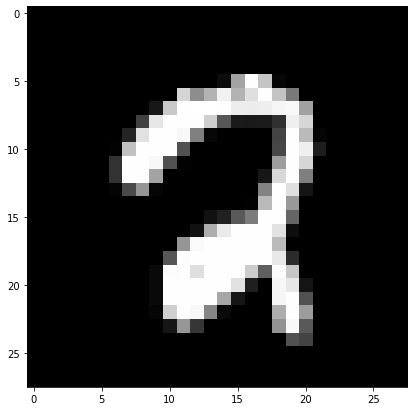

In [10]:
plot.figure(figsize = (7,7))
idx =119

grid_data = feat.iloc[idx].to_numpy().reshape(28,28)
plot.imshow(grid_data, cmap='gray')

print('label of {id} is {label}'.format(id=idx,label=labels[idx]))

In [11]:
model = TSNE(n_components=2, random_state=0, perplexity=5) #set seed 0
tsne_data = model.fit_transform(st_data)

In [12]:
tsne_data.shape

(10000, 2)

In [13]:
labels.shape

(10000,)

In [14]:
tsne_data = np.vstack((tsne_data.T,labels))

In [15]:
tsne_data.shape

(3, 10000)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


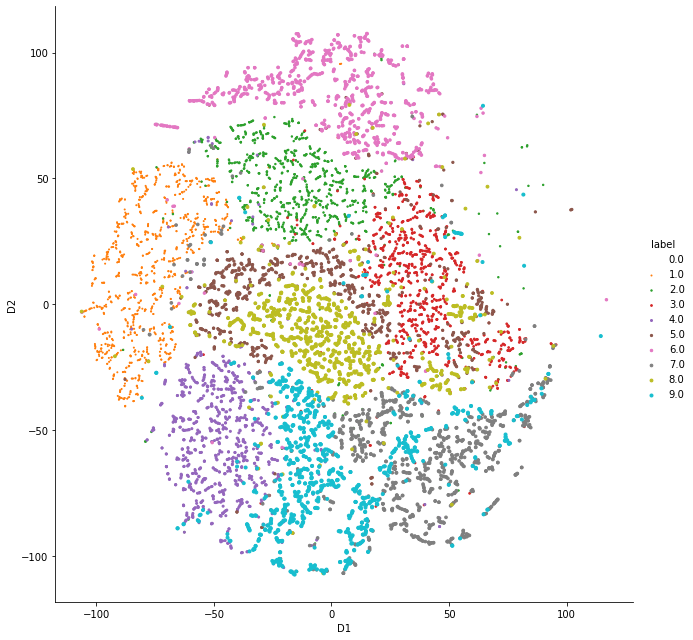

In [16]:
tsnedf = pd.DataFrame(data=tsne_data.T, columns=("D1","D2","label"))
import seaborn as sns
sns.FacetGrid(tsnedf,hue="label",size=9)\
.map(plot.scatter,"D1","D2","label")\
.add_legend()

plot.show()

In [29]:
import plotly.express as px

fig = px.scatter(tsnedf, x="D1", y="D2", color="label", height=1080, width=850,\
                hover_data=['D1','D2','label'])
fig.show()

In [40]:
model3d = TSNE(n_components=3, random_state=0, perplexity=5) #set seed 0
tsne_data3d = model3d.fit_transform(st_data)

In [41]:
tsne_data3d.shape

(10000, 3)

In [42]:
tsne_data3d = np.transpose(tsne_data3d)
tsne_data3d = np.vstack((tsne_data3d,labels))


In [43]:
tsne3ddf = pd.DataFrame(data=tsne_data3d.T, columns=("D1","D2","D3","label"))
tsne3ddf.head()

,D1,D2,D3,label
0,6.547377,-23.516029,5.019273,7.0
1,24.223143,25.004509,-12.556476,2.0
2,27.975664,8.284505,5.919045,1.0
3,-11.470416,6.544224,-28.169796,0.0
4,-6.672842,17.048981,18.459864,4.0


In [47]:
fig = px.scatter_3d(\
    tsne3ddf, x='D1', y='D2', z='D3', color=tsne3ddf['label'],\
    labels={'0': 'Dim 1', '1': 'Dim2 2', '2': 'Dim 3'}\
)
fig.show()